# Gravitational Wave Analysis

We will begin by importing data from the Gravitational-wave Transient Catalog (GWTC): https://gwosc.org/eventapi/html/GWTC/

In [1]:
import pandas as pd

gw_data = pd.read_csv('GWTC.csv')
gw_data.head()

,id,commonName,version,catalog.shortName,GPS,reference,jsonurl,mass_1_source,mass_1_source_lower,mass_1_source_upper,...,redshift_upper,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
0,GW150914-v3,GW150914,3,GWTC-1-confident,1.126259e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-confide...,35.6,-3.1,4.7,...,0.03,1.000000e-07,NaN,NaN,1.0,NaN,NaN,63.1,-3.0,3.4
1,GW151012-v3,GW151012,3,GWTC-1-confident,1.128679e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-confide...,23.2,-5.5,14.9,...,0.09,7.920000e-03,NaN,NaN,1.0,NaN,NaN,35.6,-3.8,10.8
2,GW151226-v2,GW151226,2,GWTC-1-confident,1.135136e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-confide...,13.7,-3.2,8.8,...,0.04,1.000000e-07,NaN,NaN,1.0,NaN,NaN,20.5,-1.5,6.4
3,GW170104-v2,GW170104,2,GWTC-1-confident,1.167560e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-confide...,30.8,-5.6,7.3,...,0.08,1.000000e-07,NaN,NaN,1.0,NaN,NaN,48.9,-4.0,5.1
4,GW170608-v3,GW170608,3,GWTC-1-confident,1.180922e+09,https://doi.org/10.7935/82H3-HH23,https://gwosc.org/eventapi/json/GWTC-1-confide...,11.0,-1.7,5.5,...,0.02,1.000000e-07,NaN,NaN,1.0,NaN,NaN,17.8,-0.7,3.4


In [2]:
gw_data.shape

(93, 43)

In [3]:
#We want rows that contain only confidently detected events 

confident_data = gw_data[gw_data['catalog.shortName'].str.contains('confident')].reset_index(drop = True)
confident_data.shape

(90, 43)

In [4]:
#Removing irrelevant columns – to simplify the analysis we can also ignore upper and lower errors for now

relevant_data = confident_data.drop(columns = ['id', 'version', 'reference', 'jsonurl', 'mass_1_source_lower', 
                                               'mass_1_source_upper', 'mass_2_source_lower', 'mass_2_source_upper',
                                               'network_matched_filter_snr_lower', 'network_matched_filter_snr_upper',
                                               'luminosity_distance_lower', 'luminosity_distance_upper',
                                               'chi_eff_lower', 'chi_eff_upper', 'total_mass_source_lower',
                                               'total_mass_source_upper', 'chirp_mass_source_lower', 
                                               'chirp_mass_source_upper', 'chirp_mass', 'chirp_mass_lower',
                                               'chirp_mass_upper', 'redshift_lower', 'redshift_upper', 'far_lower',
                                               'far_upper', 'p_astro_lower', 'p_astro_upper', 'final_mass_source_lower',
                                               'final_mass_source_upper', 'far'
                                               ])
relevant_data.head()

,commonName,catalog.shortName,GPS,mass_1_source,mass_2_source,network_matched_filter_snr,luminosity_distance,chi_eff,total_mass_source,chirp_mass_source,redshift,p_astro,final_mass_source
0,GW150914,GWTC-1-confident,1.126259e+09,35.6,30.6,26.0,440.0,-0.01,NaN,28.6,0.09,1.0,63.1
1,GW151012,GWTC-1-confident,1.128679e+09,23.2,13.6,10.0,1080.0,0.05,NaN,15.2,0.21,1.0,35.6
2,GW151226,GWTC-1-confident,1.135136e+09,13.7,7.7,13.1,450.0,0.18,NaN,8.9,0.09,1.0,20.5
3,GW170104,GWTC-1-confident,1.167560e+09,30.8,20.0,13.8,990.0,-0.04,NaN,21.4,0.20,1.0,48.9
4,GW170608,GWTC-1-confident,1.180922e+09,11.0,7.6,15.4,320.0,0.03,NaN,7.9,0.07,1.0,17.8


In [5]:
#Inconsistent and missing values for "total_mass_source" – we will drop this column and add a corrected one

df = relevant_data.drop(columns = 'total_mass_source')

df.insert(5, 'total_mass_source', df['mass_1_source'] + df['mass_2_source'])
df.head()

,commonName,catalog.shortName,GPS,mass_1_source,mass_2_source,total_mass_source,network_matched_filter_snr,luminosity_distance,chi_eff,chirp_mass_source,redshift,p_astro,final_mass_source
0,GW150914,GWTC-1-confident,1.126259e+09,35.6,30.6,66.2,26.0,440.0,-0.01,28.6,0.09,1.0,63.1
1,GW151012,GWTC-1-confident,1.128679e+09,23.2,13.6,36.8,10.0,1080.0,0.05,15.2,0.21,1.0,35.6
2,GW151226,GWTC-1-confident,1.135136e+09,13.7,7.7,21.4,13.1,450.0,0.18,8.9,0.09,1.0,20.5
3,GW170104,GWTC-1-confident,1.167560e+09,30.8,20.0,50.8,13.8,990.0,-0.04,21.4,0.20,1.0,48.9
4,GW170608,GWTC-1-confident,1.180922e+09,11.0,7.6,18.6,15.4,320.0,0.03,7.9,0.07,1.0,17.8


In [6]:
#We will reorder "final_mass_source" and place it next to "total_mass_source" to better organize the data

column_names = df.columns.tolist()
last_column = column_names[-1]
column_names.remove(last_column)
column_names.insert(6, last_column)

df = df[column_names]
df.head()

,commonName,catalog.shortName,GPS,mass_1_source,mass_2_source,total_mass_source,final_mass_source,network_matched_filter_snr,luminosity_distance,chi_eff,chirp_mass_source,redshift,p_astro
0,GW150914,GWTC-1-confident,1.126259e+09,35.6,30.6,66.2,63.1,26.0,440.0,-0.01,28.6,0.09,1.0
1,GW151012,GWTC-1-confident,1.128679e+09,23.2,13.6,36.8,35.6,10.0,1080.0,0.05,15.2,0.21,1.0
2,GW151226,GWTC-1-confident,1.135136e+09,13.7,7.7,21.4,20.5,13.1,450.0,0.18,8.9,0.09,1.0
3,GW170104,GWTC-1-confident,1.167560e+09,30.8,20.0,50.8,48.9,13.8,990.0,-0.04,21.4,0.20,1.0
4,GW170608,GWTC-1-confident,1.180922e+09,11.0,7.6,18.6,17.8,15.4,320.0,0.03,7.9,0.07,1.0


In [7]:
#Create new column that measures the radiated energy from the merger event

df.insert(7, 'radiated_energy', df['total_mass_source'] - df['final_mass_source'])
df

,commonName,catalog.shortName,GPS,mass_1_source,mass_2_source,total_mass_source,final_mass_source,radiated_energy,network_matched_filter_snr,luminosity_distance,chi_eff,chirp_mass_source,redshift,p_astro
0,GW150914,GWTC-1-confident,1.126259e+09,35.6,30.6,66.2,63.1,3.1,26.0,440.0,-0.01,28.60,0.09,1.00000
1,GW151012,GWTC-1-confident,1.128679e+09,23.2,13.6,36.8,35.6,1.2,10.0,1080.0,0.05,15.20,0.21,1.00000
2,GW151226,GWTC-1-confident,1.135136e+09,13.7,7.7,21.4,20.5,0.9,13.1,450.0,0.18,8.90,0.09,1.00000
3,GW170104,GWTC-1-confident,1.167560e+09,30.8,20.0,50.8,48.9,1.9,13.8,990.0,-0.04,21.40,0.20,1.00000
4,GW170608,GWTC-1-confident,1.180922e+09,11.0,7.6,18.6,17.8,0.8,15.4,320.0,0.03,7.90,0.07,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,GW200306_093714,GWTC-3-confident,1.267523e+09,28.3,14.8,43.1,41.7,1.4,7.8,2100.0,0.32,17.50,0.38,0.81156
86,GW200308_173609,GWTC-3-confident,1.267724e+09,36.4,13.8,50.2,47.4,2.8,7.1,5400.0,0.65,19.00,0.83,0.85660
87,GW200311_115853,GWTC-3-confident,1.267963e+09,34.2,27.7,61.9,59.0,2.9,17.8,1170.0,-0.02,26.60,0.23,0.99000
88,GW200316_215756,GWTC-3-confident,1.268431e+09,13.1,7.8,20.9,20.2,0.7,10.3,1120.0,0.13,8.75,0.22,0.99000


It seems we have just spotted something interesting in the data!

First, we notice that the radiated energy for GW150914 is 3.1 (solar masses * c^2), which is exactly in agreement with the published results from the Ligo/Virgo collaboration: https://en.wikipedia.org/wiki/First_observation_of_gravitational_waves

Second, we notice that the radiated energy for GW200322_091133 is negative! We know from conservation of energy that this is an impossible result. The data seems to be implying that the resulting black hole gained an extra 5 solar masses out of nowhere! 

We must investigate further to understand the reasons for this descrepency.

In [8]:
#Lets find all the rows with negative values for radiated energy

negative_energy = df[df['radiated_energy'] < 0]
negative_energy

,commonName,catalog.shortName,GPS,mass_1_source,mass_2_source,total_mass_source,final_mass_source,radiated_energy,network_matched_filter_snr,luminosity_distance,chi_eff,chirp_mass_source,redshift,p_astro
8,GW170817,GWTC-1-confident,1.187009e+09,1.46,1.27,2.73,2.8,-0.07,33.0,40.0,0.00,1.186,0.01,1.00000
89,GW200322_091133,GWTC-3-confident,1.268904e+09,34.00,14.00,48.00,53.0,-5.00,6.0,3600.0,0.24,15.500,0.60,0.61501


Seems like only a couple of events have this issue, and GW170817 by only a small amount (-0.07). By further investigating the publications on GW170817 (https://en.wikipedia.org/wiki/GW170817), we can see that it was the first detection of a neutron star binary merger (hence why the masses are so small in comparison to other events). 

We can reason that the discrepency for negative radiated energy can be attributed to the errors in the measurments of the source masses – which means that now might be a good time to investigate how large these errors can be.

In [9]:
errors = confident_data[['commonName','mass_1_source_lower', 'mass_1_source_upper', 'mass_2_source_lower', 'mass_2_source_upper']]
errors

,commonName,mass_1_source_lower,mass_1_source_upper,mass_2_source_lower,mass_2_source_upper
0,GW150914,-3.1,4.7,-4.4,3.0
1,GW151012,-5.5,14.9,-4.8,4.1
2,GW151226,-3.2,8.8,-2.5,2.2
3,GW170104,-5.6,7.3,-4.6,4.9
4,GW170608,-1.7,5.5,-2.2,1.4
...,...,...,...,...,...
85,GW200306_093714,-7.7,17.1,-6.4,6.5
86,GW200308_173609,-9.6,11.2,-3.3,7.2
87,GW200311_115853,-3.8,6.4,-5.9,4.1
88,GW200316_215756,-2.9,10.2,-2.9,1.9


From simple inspection we can see that some events such as GW170608 have relatively low upper and lower errors, but GW200322_091133 (the event we found with negative radiated energy) has a whopping upper error margin of 48 solar masses! This explains why we got a negative value – there is currently too much uncertainty in the measurements for this event. 

Another important column we can look at is "p_astro" – which tells us the probability that the detection came from an actual astrophysical event:

In [10]:
astro_prob = df[['commonName','p_astro']]
astro_prob

,commonName,p_astro
0,GW150914,1.00000
1,GW151012,1.00000
2,GW151226,1.00000
3,GW170104,1.00000
4,GW170608,1.00000
...,...,...
85,GW200306_093714,0.81156
86,GW200308_173609,0.85660
87,GW200311_115853,0.99000
88,GW200316_215756,0.99000


Again, we can see that GW200322_091133 stands out with a low probability of 61% in comparison to other events. Let's see how many events remain if we are more selective and filter for 80% probability:

In [11]:
df = df[df['p_astro'] >= 0.8].reset_index(drop = True)
df

,commonName,catalog.shortName,GPS,mass_1_source,mass_2_source,total_mass_source,final_mass_source,radiated_energy,network_matched_filter_snr,luminosity_distance,chi_eff,chirp_mass_source,redshift,p_astro
0,GW150914,GWTC-1-confident,1.126259e+09,35.6,30.6,66.2,63.1,3.1,26.0,440.0,-0.01,28.60,0.09,1.00000
1,GW151012,GWTC-1-confident,1.128679e+09,23.2,13.6,36.8,35.6,1.2,10.0,1080.0,0.05,15.20,0.21,1.00000
2,GW151226,GWTC-1-confident,1.135136e+09,13.7,7.7,21.4,20.5,0.9,13.1,450.0,0.18,8.90,0.09,1.00000
3,GW170104,GWTC-1-confident,1.167560e+09,30.8,20.0,50.8,48.9,1.9,13.8,990.0,-0.04,21.40,0.20,1.00000
4,GW170608,GWTC-1-confident,1.180922e+09,11.0,7.6,18.6,17.8,0.8,15.4,320.0,0.03,7.90,0.07,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,GW200302_015811,GWTC-3-confident,1.267150e+09,37.8,20.0,57.8,55.5,2.3,10.8,1480.0,0.01,23.40,0.28,0.90643
70,GW200306_093714,GWTC-3-confident,1.267523e+09,28.3,14.8,43.1,41.7,1.4,7.8,2100.0,0.32,17.50,0.38,0.81156
71,GW200308_173609,GWTC-3-confident,1.267724e+09,36.4,13.8,50.2,47.4,2.8,7.1,5400.0,0.65,19.00,0.83,0.85660
72,GW200311_115853,GWTC-3-confident,1.267963e+09,34.2,27.7,61.9,59.0,2.9,17.8,1170.0,-0.02,26.60,0.23,0.99000


We retain 74 events, which is not too bad. At least now we have a much higher degree of confidence in the accuracy of the features that we will later be working with to develop our machine learning model. 

Next, one last step is that we want to make sure we are only working with black holes. For the purposes of this project, we don't want to add any unecessary complexities that neutron stars might introduce.

To accomplish this, we will filter out any event that has any mass below 3 solar masses (the Tolman–Oppenheimer–Volkoff limit for neutron stars is ~2.1 solar masses, but we will be a bit conservative because of the error bars).

In [12]:
df = df[(df['mass_1_source'] >= 3) & (df['mass_2_source'] >= 3)].reset_index(drop = True)
df

,commonName,catalog.shortName,GPS,mass_1_source,mass_2_source,total_mass_source,final_mass_source,radiated_energy,network_matched_filter_snr,luminosity_distance,chi_eff,chirp_mass_source,redshift,p_astro
0,GW150914,GWTC-1-confident,1.126259e+09,35.6,30.6,66.2,63.1,3.1,26.0,440.0,-0.01,28.60,0.09,1.00000
1,GW151012,GWTC-1-confident,1.128679e+09,23.2,13.6,36.8,35.6,1.2,10.0,1080.0,0.05,15.20,0.21,1.00000
2,GW151226,GWTC-1-confident,1.135136e+09,13.7,7.7,21.4,20.5,0.9,13.1,450.0,0.18,8.90,0.09,1.00000
3,GW170104,GWTC-1-confident,1.167560e+09,30.8,20.0,50.8,48.9,1.9,13.8,990.0,-0.04,21.40,0.20,1.00000
4,GW170608,GWTC-1-confident,1.180922e+09,11.0,7.6,18.6,17.8,0.8,15.4,320.0,0.03,7.90,0.07,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,GW200302_015811,GWTC-3-confident,1.267150e+09,37.8,20.0,57.8,55.5,2.3,10.8,1480.0,0.01,23.40,0.28,0.90643
66,GW200306_093714,GWTC-3-confident,1.267523e+09,28.3,14.8,43.1,41.7,1.4,7.8,2100.0,0.32,17.50,0.38,0.81156
67,GW200308_173609,GWTC-3-confident,1.267724e+09,36.4,13.8,50.2,47.4,2.8,7.1,5400.0,0.65,19.00,0.83,0.85660
68,GW200311_115853,GWTC-3-confident,1.267963e+09,34.2,27.7,61.9,59.0,2.9,17.8,1170.0,-0.02,26.60,0.23,0.99000


This gives us our final collection of events that we will analyze. Each individual event has access to 32s of data around the time of merger which we will then use to extract new features for our model. 

In [13]:
#Good time to save our cleaned dataset

df.to_csv('GWTC_cleaned.csv', index=False) 

Now, for the next part we will begin by creating a list of all the events we will later iterate over to download the data.

In [14]:
events = [i for i in df['commonName']]
events

['GW150914',
 'GW151012',
 'GW151226',
 'GW170104',
 'GW170608',
 'GW170729',
 'GW170809',
 'GW170814',
 'GW170818',
 'GW170823',
 'GW190408_181802',
 'GW190412',
 'GW190413_052954',
 'GW190413_134308',
 'GW190421_213856',
 'GW190503_185404',
 'GW190512_180714',
 'GW190513_205428',
 'GW190517_055101',
 'GW190519_153544',
 'GW190521',
 'GW190521_074359',
 'GW190527_092055',
 'GW190602_175927',
 'GW190620_030421',
 'GW190630_185205',
 'GW190701_203306',
 'GW190706_222641',
 'GW190707_093326',
 'GW190708_232457',
 'GW190719_215514',
 'GW190720_000836',
 'GW190725_174728',
 'GW190727_060333',
 'GW190728_064510',
 'GW190731_140936',
 'GW190803_022701',
 'GW190805_211137',
 'GW190828_063405',
 'GW190828_065509',
 'GW190910_112807',
 'GW190915_235702',
 'GW190924_021846',
 'GW190925_232845',
 'GW190929_012149',
 'GW190930_133541',
 'GW191103_012549',
 'GW191105_143521',
 'GW191109_010717',
 'GW191129_134029',
 'GW191204_171526',
 'GW191215_223052',
 'GW191216_213338',
 'GW191222_033537',
 'GW

In [15]:
len(events)

70

For now we will just import data from the first ever detection event (GW150914), and then later we will generalize the procedure for all other events.

In [16]:
from gwosc import datasets
from gwosc.datasets import find_datasets

GWTC = datasets.find_datasets(type='events', catalog='GWTC-1-confident')
print('First Black Hole Merger:', GWTC[0])

First Black Hole Merger: GW150914-v3


In [17]:
from gwosc.locate import get_event_urls

GW150914_file = get_event_urls('GW150914', duration=32, detector='H1')
print(GW150914_file)

['https://gwosc.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5']


In [18]:
import urllib.request

filename = events[0] + '.hdf5'
print('Downloading ' + GW150914_file[0])
urllib.request.urlretrieve(GW150914_file[0], filename) 
print("File download complete:", filename)

File download complete: GW150914.hdf5


Now we will just take a quick look at the data to see if it has been downloaded correctly:

In [19]:
import numpy as np
import h5py

data = h5py.File(filename, 'r')

for key in data.keys():
    print(key)

meta
quality
strain


In [20]:
#The strain data is what we are interested in – this is the fractional change in length between the observatories two arms caused by a passing gravitational wave.

strain = np.array(data['strain']['Strain'])
print(strain)

[9.06730891e-21 2.01178871e-20 3.71290472e-20 ... 5.32101440e-20
 4.74831535e-20 7.76456828e-20]


As we can tell, this fractional change is very, very, small (less than one-thousandth the diameter of a proton).

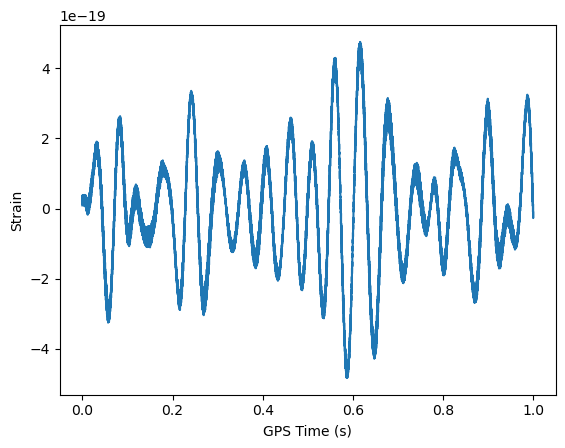

In [21]:
#Simple visual plot of the data
import matplotlib.pyplot as plt

num_samples = 10000
time = np.arange(0, 1, 1/num_samples)

plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('Strain')
plt.show()

We can see everything is working as intended.

Next we will go over the generalized procedure for importing all the data in our entire events list:

In [22]:
all_urls = []

for event in events:
    url_list = get_event_urls(event, duration=32, detector='H1')
    
    # If no URL for detector 'H1', get the URL for detector 'L1'
    if not url_list:
        url_list = get_event_urls(event, duration=32, detector='L1')
    
    all_urls.extend(url_list)   

*It is important to note that having multiple detectors in different parts of the world is necessary for making new detections, because this is the only way to distinguish if a potential signal is real or a glitch. At any given moment in time, any of the detectors can experience a glitch which might resemble a signal from a real gravitational wave. However, it would be extremely unlikely that all the detectors would experience a similar glitch at the same time. This is why we have multiple detectors which can be used to corroborate real astrophysical signals. For our case, since we are analyzing events which have already been confirmed, we don't necesarily need simultaneous data from all the detectors, and choosing between one or the other should not adversely impact our goals in this project. That is why it will be okay if we take most of the data from H1 and then any missing data from L1.

In [23]:
#Download data for all other events

def download(url):
    filename = events[i] + '.hdf5'
    print('Downloading ' + url )
    urllib.request.urlretrieve(url, filename)  
    print("File download complete:", filename)
    return filename 

for i in range(1, 70):
    url = all_urls[i]
    download(url)

File download complete: GW151012.hdf5
File download complete: GW151226.hdf5
File download complete: GW170104.hdf5
File download complete: GW170608.hdf5
File download complete: GW170729.hdf5
File download complete: GW170809.hdf5
File download complete: GW170814.hdf5
File download complete: GW170818.hdf5
File download complete: GW170823.hdf5
File download complete: GW190408_181802.hdf5
File download complete: GW190412.hdf5
File download complete: GW190413_052954.hdf5
File download complete: GW190413_134308.hdf5
File download complete: GW190421_213856.hdf5
File download complete: GW190503_185404.hdf5
File download complete: GW190512_180714.hdf5
File download complete: GW190513_205428.hdf5
File download complete: GW190517_055101.hdf5
File download complete: GW190519_153544.hdf5
File download complete: GW190521.hdf5
File download complete: GW190521_074359.hdf5
File download complete: GW190527_092055.hdf5
File download complete: GW190602_175927.hdf5
File download complete: GW190620_030421.hd

File download complete: GW191216_213338.hdf5
File download complete: GW191222_033537.hdf5
File download complete: GW191230_180458.hdf5
File download complete: GW200112_155838.hdf5
File download complete: GW200128_022011.hdf5
File download complete: GW200129_065458.hdf5
File download complete: GW200202_154313.hdf5
File download complete: GW200208_130117.hdf5
File download complete: GW200209_085452.hdf5
File download complete: GW200219_094415.hdf5
File download complete: GW200220_124850.hdf5
File download complete: GW200224_222234.hdf5
File download complete: GW200225_060421.hdf5
File download complete: GW200302_015811.hdf5
File download complete: GW200306_093714.hdf5
File download complete: GW200308_173609.hdf5
File download complete: GW200311_115853.hdf5
File download complete: GW200316_215756.hdf5


In [24]:
len(all_urls)

70

Now we have all the data we need!